# Unsupervised Image Coloring
In this Unsupervised project, I have trained a model on existing kaggle datasets to colorize black and white images.

## The Idea
The idea is to take color images, preprocess and append to an array, then convert a copy of each image into gray scale then append to a different array. Next up is to fit the model to the training matrix.

## Problems
In the Kaggle environment I'm unable to train over the full dataset without maxing-out RAM thus crashing my session. It's infuriating.

That said, the model isn't as well-fit as it should be. I played around with generators, but ultimately gave up due to vague complexities.

### Imports

In [ ]:
# import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras
# Print TF version
print(tf.__version__)



In [2]:
# Load model I trained locally and retrain it in Kaggle
# from keras.models import load_model
# new_model = load_model('/kaggle/input/wtf/keras/wtf/1/model.h5')

## Paths to datasets

In [76]:
IMAGE_PATH_NATURAL = '/kaggle/input/natural-images/natural_images'
IMAGE_PATH_TRAIN = '/kaggle/input/scene-classification/train-scene classification'

folder_paths = []
image_paths = []

## Define a folder iterator that accepts a callback
Loop through directories 


In [4]:
def iterate_folders(path, callback=print):
    """
    Function to iterate over subfolders inside a given path and call a callback function with the path of each subfolder.
    
    Args:
    - path (str): Path to the directory containing subfolders.
    - callback (function): Callback function to be called with the path of each subfolder.
    """
    if not os.path.isdir(path):
        print("Error: Invalid directory path.")
        return
    
    subfolders = [f.name for f in os.scandir(path) if f.is_dir()]
    if not subfolders:
        print("No subfolders found.")
        return
    
    print("Subfolders in", path, ":")
    for folder in subfolders:
        subfolder_path = os.path.join(path, folder)
#         files = os.listdir(path)
        callback(subfolder_path)


iterate_folders(IMAGE_PATH_NATURAL)
iterate_folders(IMAGE_PATH_TRAIN)

Subfolders in /kaggle/input/natural-images/natural_images :
/kaggle/input/natural-images/natural_images/motorbike
/kaggle/input/natural-images/natural_images/airplane
/kaggle/input/natural-images/natural_images/flower
/kaggle/input/natural-images/natural_images/dog
/kaggle/input/natural-images/natural_images/fruit
/kaggle/input/natural-images/natural_images/car
/kaggle/input/natural-images/natural_images/cat
/kaggle/input/natural-images/natural_images/person
Subfolders in /kaggle/input/scene-classification/train-scene classification :
/kaggle/input/scene-classification/train-scene classification/train


In [5]:
# folder_paths

In [6]:
def list_files_in_directory(directory, callback):
    """
    Function to list all files in a directory.
    
    Args:
    - directory (str): Path to the directory.
    """
    if not os.path.isdir(directory):
        print("Error: Invalid directory path.")
        return
    
    files = [f.name for f in os.scandir(directory) if f.is_file()]
    print("Files in", directory, ":")

    cnt = 0
    for file in files:
        if cnt > 200:
            break
        callback(os.path.join(directory, file))
        cnt += 1
        
# iterate_folders(IMAGE_PATH_NATURAL, lambda p: list_files_in_directory(p, print))

In [7]:
print(len(image_paths))

0


In [8]:
# defining the size of the image
IMG_SIZE = 320


In [9]:

color_imgs = []
gray_imgs = []

def loadImages(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #resizing image
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32') / 255.0

    color_imgs.append(img_to_array(img))
    gray_imgs.append(img_to_array(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))

## Lambda for the win!
I work in python daily, but I seldom use lambda functions. This was fun

In [10]:
# Load natural images
iterate_folders(IMAGE_PATH_NATURAL, lambda p: list_files_in_directory(p, loadImages))

Subfolders in /kaggle/input/natural-images/natural_images :
Files in /kaggle/input/natural-images/natural_images/motorbike :
Files in /kaggle/input/natural-images/natural_images/airplane :
Files in /kaggle/input/natural-images/natural_images/flower :
Files in /kaggle/input/natural-images/natural_images/dog :
Files in /kaggle/input/natural-images/natural_images/fruit :
Files in /kaggle/input/natural-images/natural_images/car :
Files in /kaggle/input/natural-images/natural_images/cat :
Files in /kaggle/input/natural-images/natural_images/person :


In [11]:
# Load scene images
iterate_folders(IMAGE_PATH_TRAIN, lambda p: list_files_in_directory(p, loadImages))

Subfolders in /kaggle/input/scene-classification/train-scene classification :
Files in /kaggle/input/scene-classification/train-scene classification/train :


In [77]:
# Sanity check
print(len(color_imgs))
print(len(gray_imgs))


1809
1809


## Testing out generators

In [13]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
# # Define ImageDataGenerator for data augmentation (if needed)
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# # def loadImages(path):
# #     img = cv2.imread(path)
# #     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# #     #resizing image
# #     img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
# #     img = img.astype('float32') / 255.0

# #     color_imgs.append(img_to_array(img))
# #     gray_imgs.append(img_to_array(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))
    
# # Define batch size
# batch_size = 32

# # Create train and validation data generators
# train_generator = train_datagen.flow_from_directory(
#     directory='/kaggle/input/natural-images/',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=batch_size,
#     class_mode='input',  # Use 'input' for grayscale images or 'rgb' for color images
#     subset='training',
#     shuffle=True
# )

# validation_generator = train_datagen.flow_from_directory(
#     directory='/kaggle/input/natural-images/',
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=batch_size,
#     class_mode='input',  # Use 'input' for grayscale images or 'rgb' for color images
#     subset='validation',
#     shuffle=False
# )

In [15]:
# # print(folder_paths)
# my_model = model()
# # my_model.summary()
# # Compile the model once outside the loop


# # my_model.compile(optimizer='adam', loss='mean_squared_error')
# my_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error', metrics = ['acc'])
# # Iterate over folders containing images
# for folder_path in folder_paths:
#     # Create train and validation data generators for the current folder
#     train_generator = train_datagen.flow_from_directory(
#         directory=folder_path,
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=batch_size,
#         class_mode='input',
#         subset='training',
#         shuffle=True
#     )

#     validation_generator = train_datagen.flow_from_directory(
#         directory=folder_path,
#         target_size=(IMG_SIZE, IMG_SIZE),
#         batch_size=batch_size,
#         class_mode='input',  # Use 'input' for grayscale images or 'rgb' for color images
#         subset='validation',
#         shuffle=False
#     )

#     # Fit the model with the current data generators
#     my_model.fit(train_generator, validation_data=validation_generator, epochs=10)

In [16]:
# model = model()
# model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# model.fit(train_generator, epochs=50, validation_data=validation_generator)
# model.fit(train_g, train_c, epochs = 50,batch_size = 50,verbose = 0)

In [18]:
print(len(color_imgs))
print(len(gray_imgs))

1809
1809


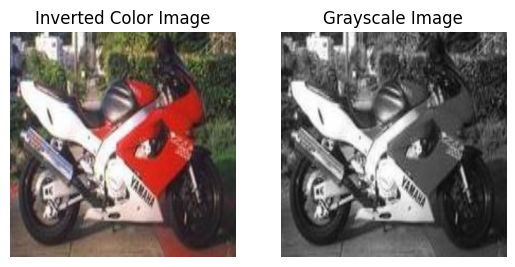

In [19]:
# Sanity check
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(color_imgs[10], cmap='gray')
plt.title('Inverted Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_imgs[10].squeeze(), cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

In [20]:
total_images = len(gray_imgs)  # Assuming gray_imgs and color_imgs have the same length

# Calculate the number of images for training and testing
num_train_images = total_images // 2
num_test_images = total_images - num_train_images

# Split the datasets into train and test sets
train_gray_image = gray_imgs[:num_train_images]
train_color_image = color_imgs[:num_train_images]

test_gray_image = gray_imgs[num_train_images:]
test_color_image = color_imgs[num_train_images:]

# Reshaping for gray images (1 channel)
train_g = np.reshape(train_gray_image, (len(train_gray_image), IMG_SIZE, IMG_SIZE, 1))
test_g = np.reshape(test_gray_image, (len(test_gray_image), IMG_SIZE, IMG_SIZE, 1))

# Reshaping for color images (3 channels)
train_c = np.reshape(train_color_image, (len(train_color_image), IMG_SIZE, IMG_SIZE, 3))
test_c = np.reshape(test_color_image, (len(test_color_image), IMG_SIZE, IMG_SIZE, 3))


In [21]:
print(len(color_imgs))

1809


In [22]:
# from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(keras.layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(keras.layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(keras.layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample


In [23]:
def model():
    inputs = keras.layers.Input(shape=[IMG_SIZE, IMG_SIZE, 1])  # Input shape for grayscale images
    repeated_inputs = keras.layers.Concatenate()([inputs, inputs, inputs])  # Repeat grayscale input to simulate 3-channel input
    d1 = down(128, (3, 3), False)(repeated_inputs)
    d2 = down(128, (3, 3), False)(d1)
    d3 = down(256, (3, 3), True)(d2)
    d4 = down(512, (3, 3), True)(d3)
    
    d5 = down(512, (3, 3), True)(d4)
    # Upsampling
    u1 = up(512, (3, 3), False)(d5)
    u1 = keras.layers.concatenate([u1, d4])
    u2 = up(256, (3, 3), False)(u1)
    u2 = keras.layers.concatenate([u2, d3])
    u3 = up(128, (3, 3), False)(u2)
    u3 = keras.layers.concatenate([u3, d2])
    u4 = up(128, (3, 3), False)(u3)
    u4 = keras.layers.concatenate([u4, d1])
    u5 = up(3, (3, 3), False)(u4)
    u5 = keras.layers.concatenate([u5, repeated_inputs])  # Concatenate repeated inputs
    output = keras.layers.Conv2D(3, (2, 2), strides=1, padding='same')(u5)

    return tf.keras.Model(inputs=inputs, outputs=output)


In [24]:
model = model()
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 320, 320,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 320, 320,  │          0 │ input_layer[0][0… │
│ (Concatenate)       │ 3)                │            │ input_layer[0][0… │
│                     │                   │            │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 160, 160,  │      3,584 │ concatenate[0][0] │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 80, 80,    │    147,584 │ sequential[0][0]  │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 40, 40,    │    296,192 │ sequential_1[0][… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 20, 20,    │  1,182,208 │ sequential_2[0][… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 10, 10,    │  2,361,856 │ sequential_3[0][… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_5        │ (None, 20, 20,    │  2,359,808 │ sequential_4[0][… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 20, 20,    │          0 │ sequential_5[0][… │
│ (Concatenate)       │ 1024)             │            │ sequential_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 40, 40,    │  2,359,552 │ concatenate_1[0]… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 40, 40,    │          0 │ sequential_6[0][… │
│ (Concatenate)       │ 512)              │            │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_7        │ (None, 80, 80,    │    589,952 │ concatenate_2[0]… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 80, 80,    │          0 │ sequential_7[0][… │
│ (Concatenate)       │ 256)              │            │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_8        │ (None, 160, 160,  │    295,040 │ concatenate_3[0]… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 160, 160,  │          0 │ sequential_8[0][… │
│ (Concatenate)       │ 256)              │            │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_9        │ (None, 320, 320,  │      6,915 │ concatenate_4[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 9,602,766 (36.63 MB)

 Trainable params: 9,600,206 (36.62 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [25]:
# optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error', metrics = ['acc'])

model.fit(train_g, train_c, epochs = 50,batch_size = 50,verbose = 0)

I0000 00:00:1709866520.566712    5483 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [26]:
# 1. Check the shapes of test_gray_image and test_color_image
# Convert lists to NumPy arrays
test_gray_image = np.array(test_gray_image)
test_color_image = np.array(test_color_image)

# Check the shape
# print("Shape of test_gray_image:", test_gray_image.shape)
# print("Shape of test_color_image:", test_color_image.shape)
# # 2. Verify data preprocessing and scaling
# # Print some example values from test_gray_image and test_color_image
# print("Example values from test_gray_image:", test_gray_image[0])
# print("Example values from test_color_image:", test_color_image[0])

# # 3. Ensure model input layer is correctly defined
# # Assuming your model is named 'model'
# print("Model input shape:", model.input_shape)

# Evaluation
# Assuming 'model' is your compiled model
model.compile(optimizer='adam', loss='mean_squared_error')  # Example compile function, adjust as needed

# Assuming 'test_gray_image' and 'test_color_image' are your test data
evaluation_result = model.evaluate(test_gray_image, test_color_image)
print("Evaluation result:", evaluation_result)


29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - loss: 0.0088
Evaluation result: 0.00929177924990654


In [27]:
# print(len(test_gray_image),len(test_color_image))
# model.evaluate(test_gray_image,test_color_image)

In [28]:
# defining function to plot images pair
def plot_images(color,grayscale,predicted):
    print("Color image shape:", color.shape)
    print("Grayscale image shape:", grayscale.shape)
    print("Predicted image shape:", predicted.shape)
    print(predicted)
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale, cmap='gray')
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()


# print(test_gray_image)
# for i in range(50,58):
# try:
# predicted = np.clip(model.predict(test_gray_image[0].reshape(1,IMG_SIZE, IMG_SIZE,3)),0.0,1.0).reshape(IMG_SIZE, IMG_SIZE,3)
# except Exception as e:
#     print(e)
# plot_images(test_color_image[0],test_gray_image[0],predicted)


In [29]:
def formatImage(img):
    # Reshape to (1, 320, 320, 1)
    return img.reshape(1, IMG_SIZE, IMG_SIZE, 3)

In [30]:
def getPrediction(img):
    return np.clip(model.predict(formatImage(img)), 0.0, 1.0).reshape(IMG_SIZE, IMG_SIZE, 3)

In [31]:
# Assuming test_gray_image[0] is your single input image
input_image = test_gray_image[0].reshape(1, IMG_SIZE, IMG_SIZE, 1)  # Reshape to (1, 320, 320, 1)

# Predict with the model
predicted = np.clip(model.predict(input_image), 0.0, 1.0).reshape(IMG_SIZE, IMG_SIZE, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Color image shape: (320, 320, 3)
Grayscale image shape: (320, 320, 1)
Predicted image shape: (320, 320, 3)
[[[0.6794263  0.91136    0.74585766]
  [0.86389524 0.9092989  0.84061164]
  [0.90692264 0.9464729  0.9177343 ]
  ...
  [0.99683696 1.         0.9742753 ]
  [0.9815815  1.         0.93553203]
  [0.45231304 0.67546093 0.86368567]]

 [[0.85423046 0.9877615  0.84908456]
  [0.9830254  0.96473455 0.9833397 ]
  [0.95348805 0.9766767  0.9553854 ]
  ...
  [1.         0.98839915 0.9548864 ]
  [1.         1.         0.9460842 ]
  [0.46185413 0.6813463  0.9238508 ]]

 [[0.94615227 0.9772216  0.84318274]
  [1.         1.         0.97684187]
  [1.         0.9970261  0.96519655]
  ...
  [1.         1.         0.9558551 ]
  [1.         1.         0.9197158 ]
  [0.45360366 0.75076497 0.88845605]]

 ...

 [[1.         1.         0.9037096 ]
  [1.         1.         0.9159948 ]
  [1.         1.         0.88492864]
  ...
  [1.         1.         0.9142794 ]
  [1.         1.         0.8918342 ]
  [0.5

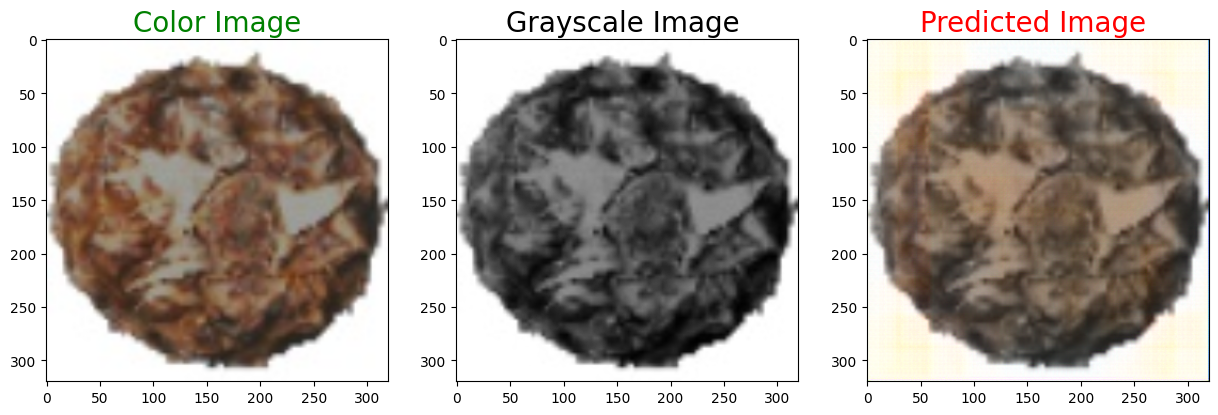

In [32]:
plot_images(test_color_image[0],test_gray_image[0],predicted)

In [33]:
# Make an API for ease of use
def preprocess_image(image_path, img_size):
    """
    Preprocesses an image by resizing it and converting it to grayscale.
    
    Args:
    - image_path (str): Path to the image file.
    - img_size (tuple): Size to which the image should be resized.
    
    Returns:
    - preprocessed_image (numpy.ndarray): Preprocessed image as a NumPy array.
    """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img.reshape(1, *img.shape, 1)  # Reshape to (1, height, width, channels)

def predict_image(model, input_image):
    """
    Predicts the colorized version of a grayscale image using a trained model.
    
    Args:
    - model (tf.keras.Model): Trained model for colorization.
    - input_image (numpy.ndarray): Grayscale input image as a NumPy array.
    
    Returns:
    - predicted_image (numpy.ndarray): Predicted colorized image as a NumPy array.
    """
    predicted_image = np.clip(model.predict(input_image), 0.0, 1.0)
    return predicted_image.squeeze()



In [57]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize image
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.astype('float32') / 255.0

    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Reshape grayscale image
    gray_img = np.reshape(gray_img, (1, IMG_SIZE, IMG_SIZE, 1))

    return gray_img

In [78]:
# Usage example:
image_path = "/kaggle/input/samples/sample/trees.jpg"
input_image = preprocess_image(image_path)
predicted_image = predict_image(model, input_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [79]:
def plot_2_images(grayscale, predicted):
    plt.figure(figsize=(15, 15))
    
    # Normalize grayscale image to range [0, 1]
    grayscale_normalized = grayscale / 255.0
#     print(predicted)
    
    # Plot grayscale image
    plt.subplot(1, 2, 1)
    plt.title('Grayscale Image', color='black', fontsize=20)
    plt.imshow(np.squeeze(grayscale_normalized), cmap='gray')
    
    # Clip predicted image pixel values to range [0, 1]
#     predicted_clipped = np.clip(predicted, 0.0, 1.0)
    
    # Plot predicted image
    plt.subplot(1, 2, 2)
    plt.title('Predicted Image', color='red', fontsize=20)
    plt.imshow(predicted)
   
    plt.show()


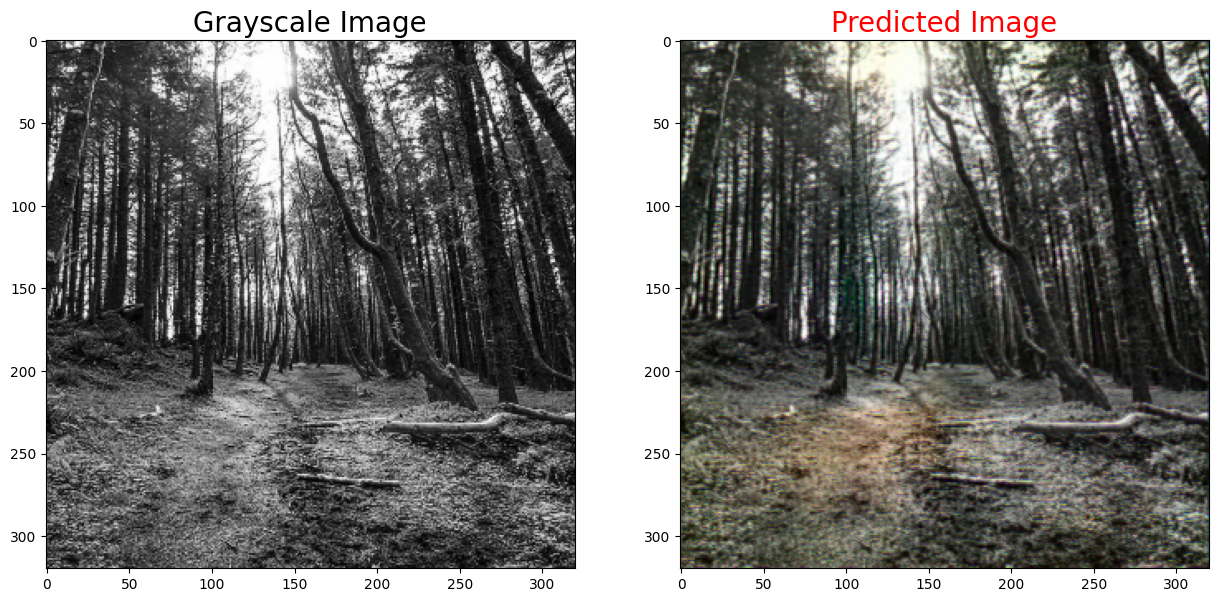

In [80]:
plot_2_images(input_image,predicted_image)